## Importing the Libraries

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
!pip list

Package                                  Version
---------------------------------------- ---------------
absl-py                                  1.4.0
accelerate                               0.32.1
aiofiles                                 23.2.1
aiohttp                                  3.9.5
aiosignal                                1.3.1
alembic                                  1.13.1
altair                                   5.1.1
altgraph                                 0.17.4
aniso8601                                9.0.1
annotated-types                          0.5.0
anyio                                    3.7.1
appdirs                                  1.4.4
argon2-cffi                              21.3.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.2.3
asgiref                                  3.7.2
asttokens                                2.2.1
astunparse                               1.6.3
async-lru                                2


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgetts


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


ERROR: Could not find a version that satisfies the requirement ipywidgetts (from versions: none)
ERROR: No matching distribution found for ipywidgetts

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                                  Version
---------------------------------------- ---------------
absl-py                                  1.4.0
accelerate                               0.32.1
aiofiles                                 23.2.1
aiohttp                                  3.9.5
aiosignal                                1.3.1
alembic                                  1.13.1
altair                                   5.1.1
altgraph                                 0.17.4
aniso8601                                9.0.1
annotated-types                          0.5.0
anyio                                    3.7.1
appdirs                                  1.4.4
argon2-cffi                              21.3.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.2.3
asgiref                                  3.7.2
asttokens                                2.2.1
astunparse                               1.6.3
async-lru                                2


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
gpus

[]

In [5]:
!pip install tensorflow-datasets


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [7]:
ds = tfds.load('fashion_mnist',split='train')

In [8]:
ds.as_numpy_iterator().next()['label']

2

# Vizulaizing the Data

In [9]:
import numpy as np

In [10]:
data_iterator = ds.as_numpy_iterator()

In [11]:
#Getting data out of the pipeline
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

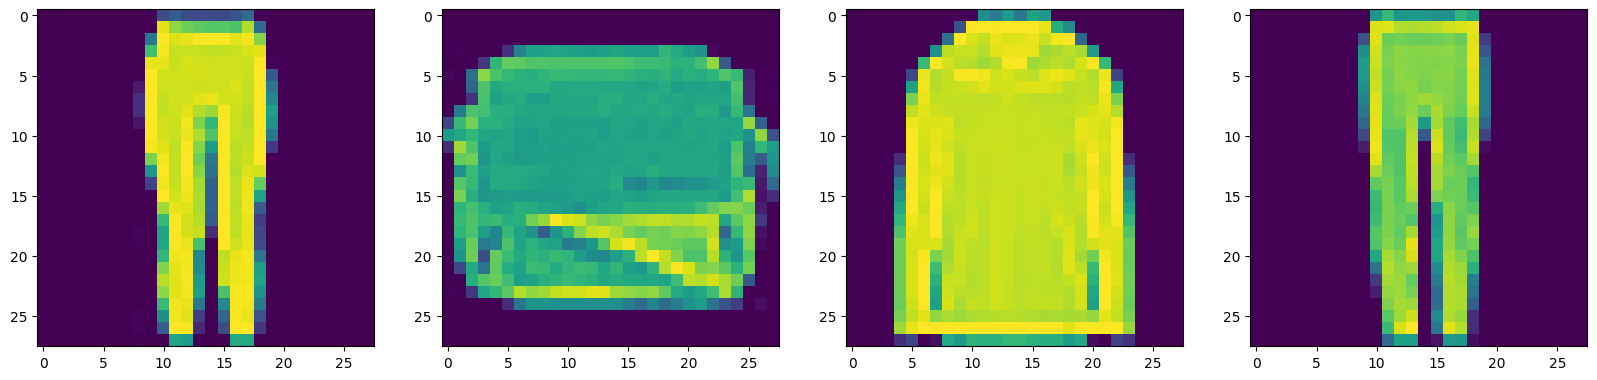

In [12]:
fig , ax = plt.subplots(ncols=4,figsize = (20,20))
for idx in range(4):
    batch = data_iterator.next()
    ax[idx].imshow(np.squeeze(batch['image']))

In [13]:
def scale_images(data):
    image = data['image']
    return image/255

In [14]:
# Reloading the dataset
ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_images) # Scaling our images
ds = ds.cache() #Cache dataset for the batch
ds = ds.shuffle(60000) #Shuffling the dataset   
ds = ds.batch(128) #Defining the batches
ds = ds.prefetch(64)  # Reduces the likelihood of bottlenecking

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Neural Network

In [16]:
#Importing all the neccesary dependencies and libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,UpSampling2D,Dropout

In [17]:
def build_generator():
    model = Sequential()
    model.add(Dense(7*7*128,input_dim =128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling layer
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolution block 1
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolution block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

    return model

In [18]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [19]:
img = generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 273ms/step


array([[[[0.49309006],
         [0.49480352],
         [0.49218577],
         ...,
         [0.49075666],
         [0.4950836 ],
         [0.49310538]],

        [[0.49326593],
         [0.49331972],
         [0.4968924 ],
         ...,
         [0.49299133],
         [0.49249068],
         [0.49403536]],

        [[0.4894476 ],
         [0.48889795],
         [0.48537153],
         ...,
         [0.4916457 ],
         [0.49265593],
         [0.494536  ]],

        ...,

        [[0.49210107],
         [0.48885384],
         [0.47517467],
         ...,
         [0.48934332],
         [0.49501467],
         [0.49603742]],

        [[0.49531707],
         [0.49892884],
         [0.49475193],
         ...,
         [0.49905908],
         [0.49879333],
         [0.49880508]],

        [[0.49660066],
         [0.49998042],
         [0.50123596],
         ...,
         [0.5027758 ],
         [0.50143534],
         [0.49995598]]],


       [[[0.48747906],
         [0.49085143],
         [0.48

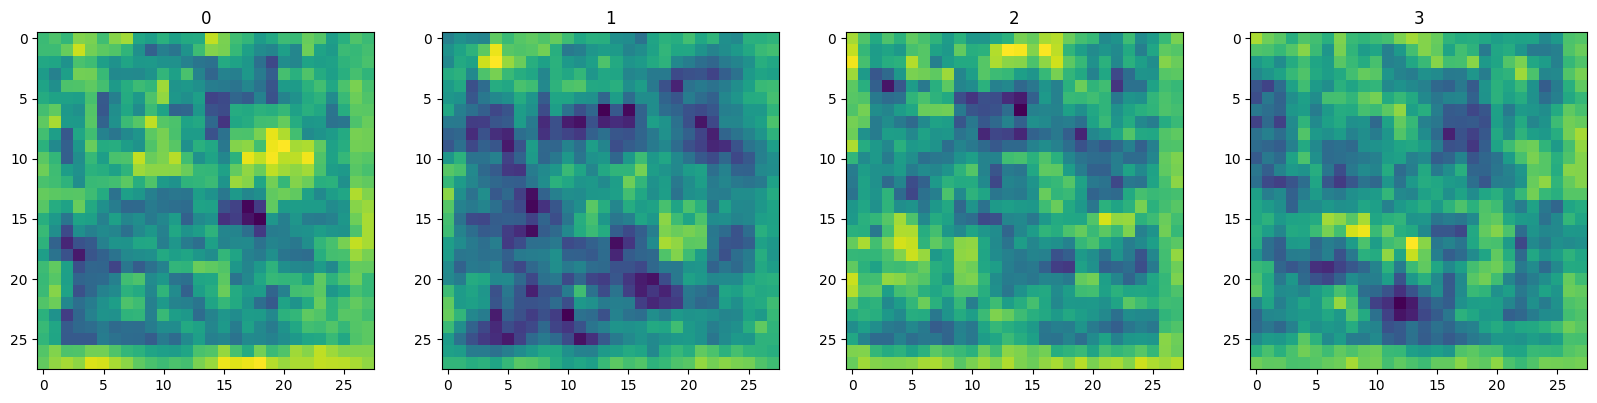

In [20]:
fig , ax = plt.subplots(ncols=4,figsize = (20,20))
for idx,i in enumerate(img):
    ax[idx].imshow(np.squeeze(i))
    ax[idx].title.set_text(idx)

# Discriminator

In [21]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
    
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(.2))
    model.add(Dropout(.4))
        
    model.add(Flatten())
    model.add(Dropout(.4))
    model.add(Dense(1,activation='sigmoid'))

    return model

In [22]:
discriminator = build_discriminator()

In [23]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

# Training loops


In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [25]:
g_opt = Adam(learning_rate=.0001)
d_opt = Adam(learning_rate=.00001)
g_loss= BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [26]:
from tensorflow.keras.models import Model

In [35]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        super().__init__(*args,**kwargs)
        
        self.generator = generator
        self.discriminator = discriminator
        
        pass

    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training = False)
        
        #Train the discriminator
        with tf.GradientTape() as d_tape:

            #Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images,training = True)
            yhat_fake = self.discriminator(fake_images,training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)
            
            # Creating labels for fake and real images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis =0)
            
            # Add noise to the true outputs
            
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)

            # loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)

        # Applying back propagation - nn learn
        dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128,1)),training=True)

            # Creating labels
            predicted_labels = self.discriminator(gen_images,training=False)

            # Generator loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
       
        ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
        
        return {"d_loss": total_d_loss,"g_loss":total_g_loss}
        


    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        super().compile(*args,**kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        pass
        

In [36]:
fashgan = FashionGAN(generator,discriminator)

In [37]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

# Building Callback


In [38]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [39]:
class ModelMonitor(Callback):
    def __init__(self,num_img=3, latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        
    def on_epoch_end(self,epoch,logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))


# Training

In [40]:
hist = fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20


469/469 [==============================] - 2222s 5s/step - d_loss: 0.5354 - g_loss: 0.8395
Epoch 2/20
469/469 [==============================] - 2083s 4s/step - d_loss: 0.3215 - g_loss: 2.6156
Epoch 3/20
469/469 [==============================] - 2128s 5s/step - d_loss: 0.2764 - g_loss: 2.6364
Epoch 4/20
469/469 [==============================] - 2158s 5s/step - d_loss: 0.4304 - g_loss: 1.9578
Epoch 5/20
469/469 [==============================] - 2129s 5s/step - d_loss: 0.5886 - g_loss: 0.6297
Epoch 6/20
469/469 [==============================] - 2125s 5s/step - d_loss: 0.3690 - g_loss: 0.1494
Epoch 7/20
469/469 [==============================] - 2136s 5s/step - d_loss: 0.6401 - g_loss: 0.3236
Epoch 8/20
469/469 [==============================] - 1967s 4s/step - d_loss: 0.6943 - g_loss: 0.6497
Epoch 9/20
469/469 [==============================] - 2067s 4s/step - d_loss: 0.6378 - g_loss: 0.6760
Epoch 10/20
469/469 [==============================] - 2024s 4s/step - d_loss: 0.3652 - g_los

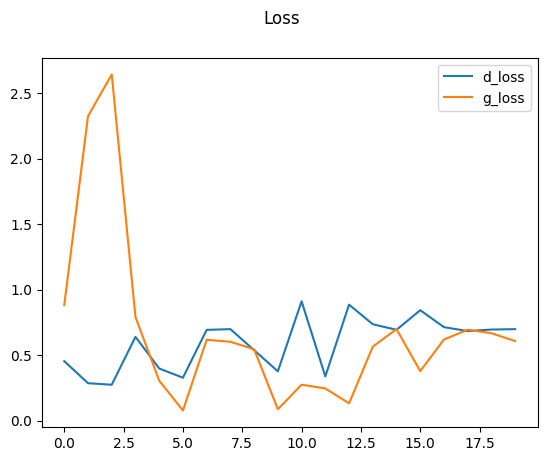

In [42]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

## Generating images

In [48]:
imgs = generator.predict(tf.random.normal((26,128,1)))

1/1 [==============================] - 0s 125ms/step


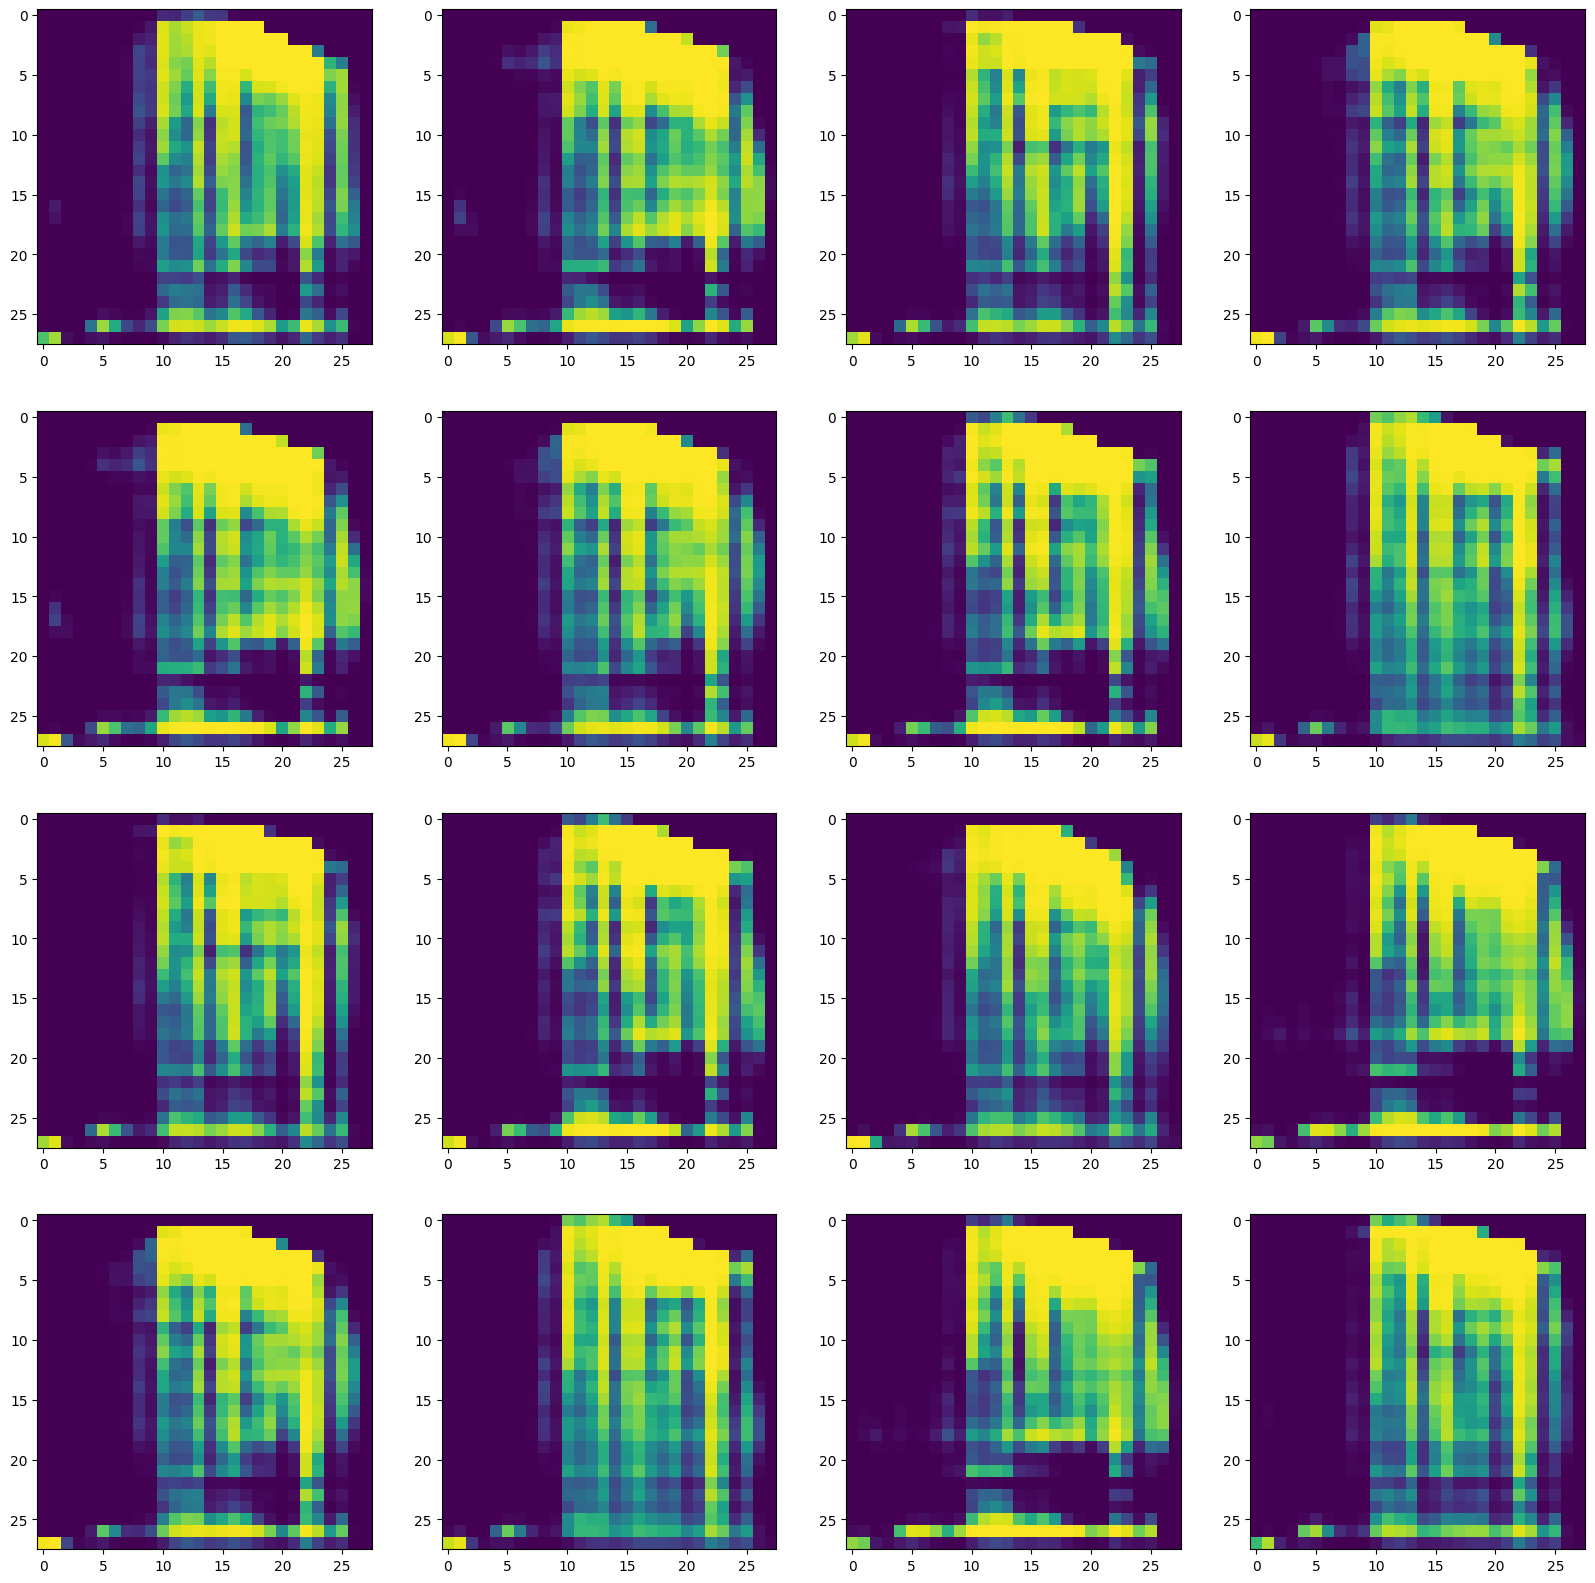

In [49]:
fix,ax=plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [50]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')